## Importing the libraries for the basic operations

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

## Importing libraries for supressing warnings and path operations

In [2]:
from pathlib import Path # for data path 
from warnings import filterwarnings
filterwarnings("ignore") # ignore un necessary warnings
import os
from imutils import paths # for image paths
import glob

In [3]:
os.getcwd()

'D:\\ML DL AI DSBDA\\Mushroom Classification using Deep Learning'

In [4]:
%cd "D://ML DL AI DSBDA//Mushroom Classification using Deep Learning//"

D:\ML DL AI DSBDA\Mushroom Classification using Deep Learning


In [16]:
data_path = Path("D://ML DL AI DSBDA//Mushroom Classification using Deep Learning//archive//Mushrooms//")

In [17]:
data_path

WindowsPath('D:/ML DL AI DSBDA/Mushroom Classification using Deep Learning/archive/Mushrooms')

In [18]:
mush_images = list(data_path.glob(r"*/*.jpg"))

In [20]:
mush_class_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], mush_images))

In [21]:
images = pd.Series(mush_images, name="JPG").astype(str)
labels = pd.Series(mush_class_labels, name="CATEGORY")

In [22]:
type(images), type(labels)

(pandas.core.series.Series, pandas.core.series.Series)

In [23]:
data = pd.concat([images, labels],axis=1)

In [24]:
data.head()

,JPG,CATEGORY
0,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
1,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
2,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
3,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
4,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus


In [25]:
data.tail()

,JPG,CATEGORY
6709,D:\ML DL AI DSBDA\Mushroom Classification usin...,Suillus
6710,D:\ML DL AI DSBDA\Mushroom Classification usin...,Suillus
6711,D:\ML DL AI DSBDA\Mushroom Classification usin...,Suillus
6712,D:\ML DL AI DSBDA\Mushroom Classification usin...,Suillus
6713,D:\ML DL AI DSBDA\Mushroom Classification usin...,Suillus


In [26]:
main_data = data.sample(frac = 1).reset_index(drop=True)

In [27]:
main_data.head(-1)

,JPG,CATEGORY
0,D:\ML DL AI DSBDA\Mushroom Classification usin...,Russula
1,D:\ML DL AI DSBDA\Mushroom Classification usin...,Amanita
2,D:\ML DL AI DSBDA\Mushroom Classification usin...,Lactarius
3,D:\ML DL AI DSBDA\Mushroom Classification usin...,Lactarius
4,D:\ML DL AI DSBDA\Mushroom Classification usin...,Russula
...,...,...
6708,D:\ML DL AI DSBDA\Mushroom Classification usin...,Lactarius
6709,D:\ML DL AI DSBDA\Mushroom Classification usin...,Suillus
6710,D:\ML DL AI DSBDA\Mushroom Classification usin...,Entoloma
6711,D:\ML DL AI DSBDA\Mushroom Classification usin...,Boletus


In [28]:
sample_data = main_data['JPG'][0:8]
sample_data

0    D:\ML DL AI DSBDA\Mushroom Classification usin...
1    D:\ML DL AI DSBDA\Mushroom Classification usin...
2    D:\ML DL AI DSBDA\Mushroom Classification usin...
3    D:\ML DL AI DSBDA\Mushroom Classification usin...
4    D:\ML DL AI DSBDA\Mushroom Classification usin...
5    D:\ML DL AI DSBDA\Mushroom Classification usin...
6    D:\ML DL AI DSBDA\Mushroom Classification usin...
7    D:\ML DL AI DSBDA\Mushroom Classification usin...
Name: JPG, dtype: object

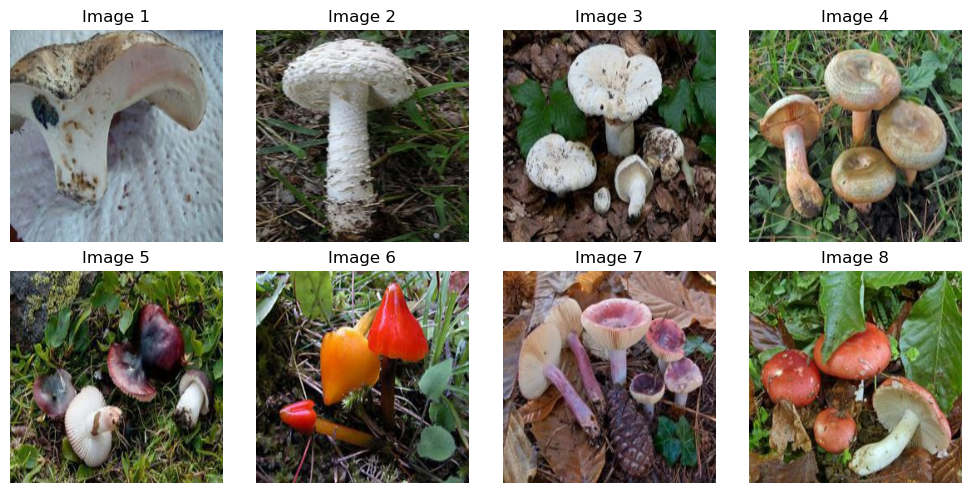

In [29]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.title("Mushroom Images")

# Iterate over the image paths and corresponding subplot axes

for i, (defective_image_arr, ax) in enumerate(zip(sample_data, axes.flatten())):
    # Load the image using any library of your choice (e.g., PIL, OpenCV)
    image = plt.imread(defective_image_arr)

    # Display the image
    ax.imshow(image)
    ax.set_title(f"Image {i+1}")  # Set a title for each subplot
    ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [30]:
sample_data_1 = main_data['JPG'][8:16]
sample_data_1

8     D:\ML DL AI DSBDA\Mushroom Classification usin...
9     D:\ML DL AI DSBDA\Mushroom Classification usin...
10    D:\ML DL AI DSBDA\Mushroom Classification usin...
11    D:\ML DL AI DSBDA\Mushroom Classification usin...
12    D:\ML DL AI DSBDA\Mushroom Classification usin...
13    D:\ML DL AI DSBDA\Mushroom Classification usin...
14    D:\ML DL AI DSBDA\Mushroom Classification usin...
15    D:\ML DL AI DSBDA\Mushroom Classification usin...
Name: JPG, dtype: object

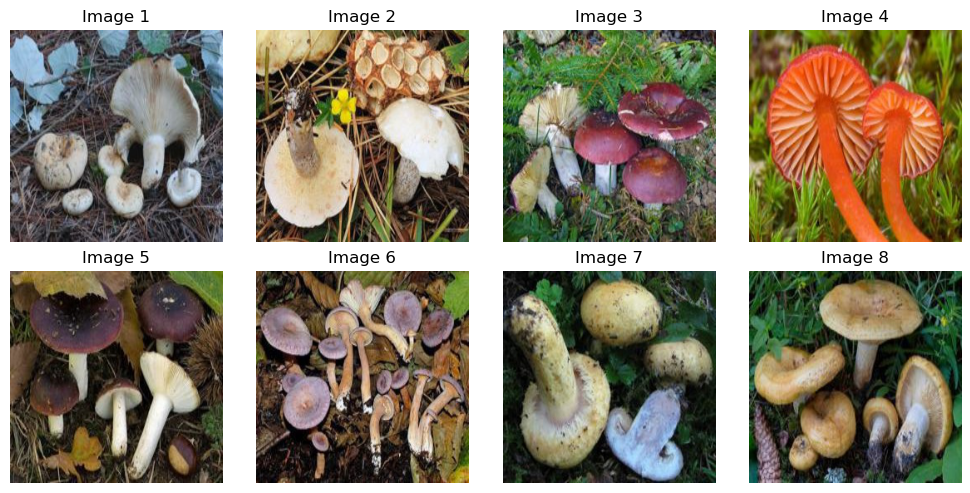

In [31]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.title("Mushroom Images")

# Iterate over the image paths and corresponding subplot axes

for i, (defective_image_arr, ax) in enumerate(zip(sample_data_1, axes.flatten())):
    # Load the image using any library of your choice (e.g., PIL, OpenCV)
    image = plt.imread(defective_image_arr)

    # Display the image
    ax.imshow(image)
    ax.set_title(f"Image {i+1}")  # Set a title for each subplot
    ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [32]:
path = "D://ML DL AI DSBDA//Mushroom Classification using Deep Learning//archive//Mushrooms//"
files = os.listdir(path)
# list of files in path
# sort path from A-Y
files.sort()

In [34]:
print("All the available folders/labels in the directory: \n")
for i in files:
    print(i)

All the available folders/labels in the directory: 

Agaricus
Amanita
Boletus
Cortinarius
Entoloma
Hygrocybe
Lactarius
Russula
Suillus


In [35]:
from tqdm import tqdm

In [36]:
# create list of image and label
image_array=[]
label_array=[]

# loop through each file in files

for i in tqdm(range(len(files))):
# list of image in each folder
  sub_file=os.listdir(path+"/"+files[i])
# let's check length of each folder
# print(len(sub_file))
# loop through each sub folder
  for j in range(len(sub_file)):
      # path of each image
      #Example:imagepro/A/image_name1.jpg
    file_path = path + "/" + files[i] + "/" + sub_file[j]
      # read each image
    image = cv2.imread(file_path)
      # resize image by 96x96
    image = cv2.resize(image,(96,96))
      # convert BGR image to RGB image
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      # add this image at image_array
    image_array.append(image)
      # add label to label_array
      # i is number from 0 to len(files)-1
      # so we can use it as label
    label_array.append(i)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:48<00:00,  5.43s/it]


In [37]:
# convert list to array
image_array = np.array(image_array)
label_array = np.array(label_array,dtype="float")
# split the dataset into test and train
# output train imagelabel spliting size
X_train, X_test, Y_train, Y_test = train_test_split(image_array, label_array, test_size=0.15)

In [38]:
del image_array,label_array
# to free memory
import gc
gc.collect()

15318

In [52]:
# Create a model
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential, Model, load_model
model = Sequential()
# add pretrained models to Sequential model
# I will use EfficientNetB0 pretrained model. You can try different model.
pretrained_model = tf.keras.applications.EfficientNetB0(input_shape = (96,96,3), include_top = False)
model.add(pretrained_model)

In [53]:
# add Pooling to model
model.add(layers.GlobalAveragePooling2D())
# add dropout to model
# We add dropout to increase accuracy by reduce overfitting
model.add(layers.Dropout(0.3))
# finally we will addd dense layer as an output
model.add(layers.Dense(1))
# For some tensorflow version we required to build model
model.build(input_shape=(None, 256, 256, 3))
# to see model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 3, 3, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [54]:
model.compile(optimizer = "adam", loss = "mae", metrics=["mae" , "accuracy"])

In [56]:
ckp_path = "trained_model/model"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = ckp_path,
    monitor = "val_mae",
    mode = "auto",
    save_best_only = True,
    save_weights_only = True
)


In [57]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor = 0.9,
    monitor = "val_mae",
    mode = "auto",
    cooldown = 0,
    patience = 5,
    verbose = 1,
    min_lr = 1e-6
)

In [60]:
import time

start = time.time()
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size = 32, epochs = 20, callbacks=[model_checkpoint, reduce_lr])
end = time.time()

total_training_time = end - start
print("Totalt time required to train the model via EfficientNet50 algorithm is: ", total_training_time)

Epoch 1/20
179/179 [==============================] - 197s 1s/step - loss: 1.7776 - mae: 1.7776 - accuracy: 0.1062 - val_loss: 1.8116 - val_mae: 1.8116 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 2/20
179/179 [==============================] - 220s 1s/step - loss: 1.3137 - mae: 1.3137 - accuracy: 0.1118 - val_loss: 1.3433 - val_mae: 1.3433 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 3/20
179/179 [==============================] - 224s 1s/step - loss: 1.0551 - mae: 1.0551 - accuracy: 0.1137 - val_loss: 1.3915 - val_mae: 1.3915 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 4/20
179/179 [==============================] - 222s 1s/step - loss: 0.9353 - mae: 0.9353 - accuracy: 0.1197 - val_loss: 1.1277 - val_mae: 1.1277 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 5/20
179/179 [==============================] - 8209s 46s/step - loss: 0.8126 - mae: 0.8126 - accuracy: 0.1237 - val_loss: 1.1260 - val_mae: 1.1260 - val_accuracy: 0.1230 - lr: 0.0010
Epoch 6/20
179/179 [==============================] - 225s

In [61]:
total_training_time

12680.820176839828

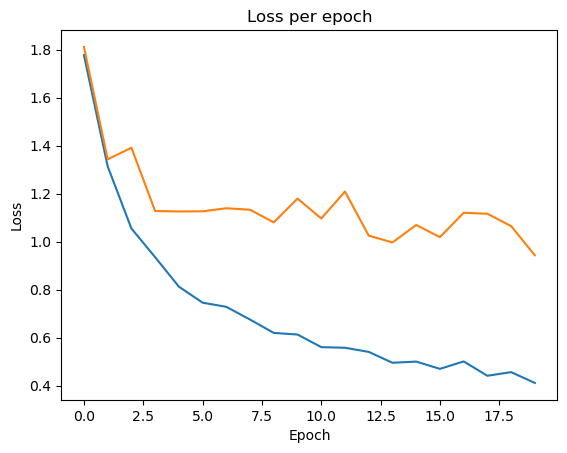

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

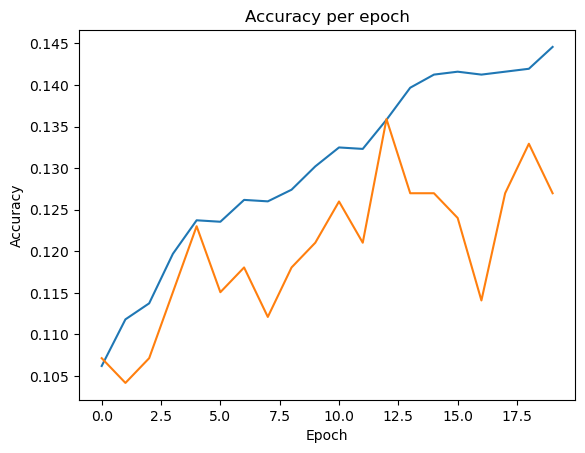

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.show()

In [67]:
os.mkdir("Trained Models")

In [1]:
# model.save("Trained Models/model.h5")